**Actividad autónoma U2-T1 (AA3)**

Brayan Cardenas




Objetivo de la actividad: Diseñar una solución orientada a objetos en 
Python que implemente desde cero el algoritmo K-Nearest Neighbors 
(KNN) para clasificar ejemplares del dataset penguins, analizando el 
efecto de distintos valores de k sobre la asignación de especie.

Instrucciones:  
Escenario: Clasificación de Pingüinos Antárticos        
Un instituto de biología necesita un clasificador que, a partir de 
mediciones morfológicas de pingüinos, prediga su especie (Adelie, 
Chinstrap o Gentoo).

In [36]:
import numpy as np
from abc import ABC


**Creacion la clase abstracta KNNBase**

In [37]:
class KNNBase(ABC):
    
    @abstractmethod
    def fit(self, X, y):
        pass

    @abstractmethod
    def distance(self, p1, p2):
        pass

    @abstractmethod
    def predict(self, X_new, k=3):
        pass

**Creacion la clase KNNClassifier**

In [38]:
class KNNClassifier(KNNBase):
    def __init__(self):
        self.__X_train = None
        self.__y_train = None

    def fit(self, X, y):
        self.__X_train = X
        self.__y_train = y

    def distance(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2)**2))

    def predict(self, X_new, k=3):
        predictions = []
        for x in X_new:
            distances = [self.distance(x, x_train) for x_train in self.__X_train]
            indices = np.argsort(distances)[:k]
            nearest_labels = [self.__y_train[i] for i in indices]
            prediction = max(set(nearest_labels), key=nearest_labels.count)
            predictions.append(prediction)
        return predictions


**Agregamos  sobrecarga de operadores**


__eq__ — igualdad de ejemplares


In [39]:
def __eq__(self, other):
        return np.array_equal(self.__X_train, other.__X_train) and np.array_equal(self.__y_train, other.__y_train)


__add__ — combinar dos clasificadores


In [40]:
def __add__(self, other):
        X_combined = np.vstack((self.__X_train, other.__X_train))
        y_combined = np.hstack((self.__y_train, other.__y_train))
        combined = KNNClassifier()
        combined.fit(X_combined, y_combined)
        return combined


Representación de ejemplares __repr__


In [41]:
def __repr__(self):
        return f"KNNClassifier with {len(self.__X_train)} training samples"

**Aplicacion**


In [42]:
import numpy as np
from abc import ABC, abstractmethod
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

**Clase abstracta KNNBase**


In [43]:
class KNNBase(ABC):
    @abstractmethod
    def fit(self, X, y):
        pass

    @abstractmethod
    def distance(self, p1, p2):
        pass

    @abstractmethod
    def predict(self, X_new, k=3):
        pass

**Clase KNNClassifier**

In [51]:
class KNNClassifier(KNNBase):
    def __init__(self):
        self.__X_train = None
        self.__y_train = None

    def fit(self, X, y):
        self.__X_train = X
        self.__y_train = y

    def distance(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))

    def predict(self, X_new, k=3):
        predictions = []
        for x in X_new:
            distances = [self.distance(x, x_train) for x_train in self.__X_train]
            indices = np.argsort(distances)[:k]
            nearest_labels = [self.__y_train[i] for i in indices]
            prediction = max(set(nearest_labels), key=nearest_labels.count)
            predictions.append(prediction)
        return predictions
    def __eq__(self, other):
        return np.array_equal(self.__X_train, other.__X_train) and np.array_equal(self.__y_train, other.__y_train)

    def __add__(self, other):
        X_combined = np.vstack((self.__X_train, other.__X_train))
        y_combined = np.hstack((self.__y_train, other.__y_train))
        combined = KNNClassifier()
        combined.fit(X_combined, y_combined)
        return combined

    def __repr__(self):
        return f"KNNClassifier with {len(self.__X_train)} training samples"

    def plot_neighbors(self, x_new, k=3):
        from sklearn.decomposition import PCA
        import matplotlib.pyplot as plt

        distances = [self.distance(x_new[0], x) for x in self.__X_train]
        indices = np.argsort(distances)[:k]

        X_all = np.vstack([self.__X_train, x_new])
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_all)

        # Graficar vecinos
        for i, point in enumerate(X_pca[:-1]):
            label = self.__y_train[i]
            color = 'red' if label == 'Adelie' else 'green' if label == 'Gentoo' else 'blue'
            marker = 'o' if i in indices else 'x'
            plt.scatter(point[0], point[1], c=color, marker=marker, s=100, label=label if i in indices else "")

        # Graficar el nuevo punto
        plt.scatter(X_pca[-1, 0], X_pca[-1, 1], c='black', marker='*', s=200, label='Nuevo')
        plt.title(f'{k} vecinos más cercanos')
        plt.xlabel('Componente 1')
        plt.ylabel('Componente 2')
        plt.legend()
        plt.grid(True)
        plt.show()

**Prueba con datos ficticios**

KNNClassifier with 4 training samples
Predicción con k=1: Adelie
Predicción con k=3: Adelie


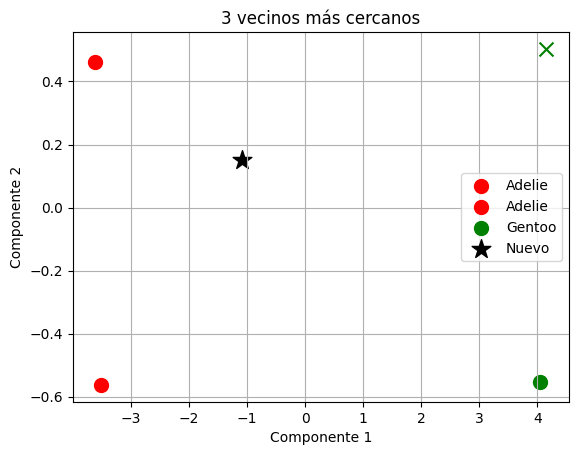

In [54]:
# Entrenamiento: [largo del pico, profundidad del pico]
X_train = np.array([
    [40.1, 18.7],  # Adelie
    [39.6, 17.8],  # Adelie
    [46.5, 14.3],  # Gentoo
    [45.8, 13.5]   # Gentoo
])
y_train = np.array(['Adelie', 'Adelie', 'Gentoo', 'Gentoo'])

# Nuevo pingüino a clasificar
X_nuevo = np.array([[42.0, 17.0]])

# Crear modelo
modelo = KNNClassifier()
modelo.fit(X_train, y_train)

# Ver modelo
print(modelo)

# Predicciones con diferentes k
for k in [1, 3]:
    pred = modelo.predict(X_nuevo, k=k)
    print(f"Predicción con k={k}: {pred[0]}")

# Mostrar gráfico del reto adicional
modelo.plot_neighbors(X_nuevo, k=3)
